# Introduction:
 

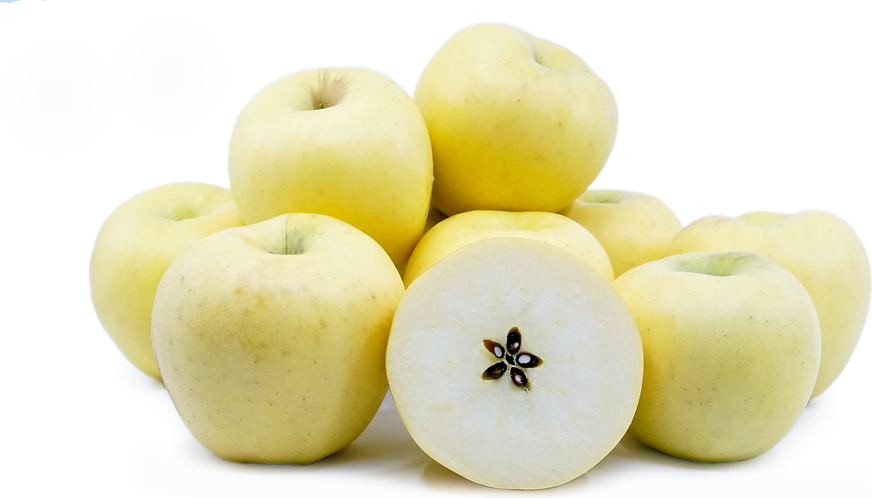

The Durban Fresh Produce Market has tasked Team 29 to help them predict the price of apples per kilogram for the year 2021/2022.
Durban Fresh Produce Market is a distribution company and is also tasked with marketing South Africa's leading delicious fruits and farmers, locally and internationally. However, the price of food has generally been increasing, thus demand has changed over the years. The covid-19 pandemic has added more strain into the ever-changing food market and has devested the world economically and the apple farmers were not spared.

Thus, to be better prepared for the future, the Durban Fresh Produce Market company would like to know if the apple farmers should expect more demand, how they will recoup the loss made due to the pandemic, how many apples they should produce, and how they should set up their prices. The Durban Fresh Produce Market company has tasked Team 29 at EDSA to help them predict the price of apples per kilogram for the year 2021/2022.

**The project aims to develop a model that is capable of accurately predicting the cost of Golden Delicious Apples per kilogram.**

**The project workflow is listed below:**


    The project workflow is listed below:

        1. Importing libraries and Data sets

        2. Data cleaning and Processing

        3. Exploratory Data Analysis

        4. Model Selection
        
        5. Model Evaluation

        6. Conclusion

# 1: Importing Libraries and Data Sets

## 1.1: Importing Necessary Libraries

In [1]:
#Other
import numpy as np
import pandas as pd
from scipy import stats
import math
import pickle
import calendar

# Visualisations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Regression models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# Model slection
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

# Metrics
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


## 1.2: Train Data

In [2]:
#Load the train data set.
train = pd.read_csv('df-train_set.csv')

## 1.3: Test Data

In [3]:
#Load the test data set.
test = pd.read_csv('df-test_set.csv')

# 2: Data Cleaning and Processing

In [4]:
#Show the first 5 rows of the train data.
train.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
0,CAPE,EC120,1L,12.0,APPLE GRANNY SMITH,2020-03-10,108.0,112.0,3236.0,29,348.0,0,9.30
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
2,GAUTENG,AT200,1L,20.0,AVOCADO PINKERTON,2020-05-05,70.0,80.0,4860.0,66,1320.0,50,3.68
3,TRANSVAAL,BJ090,1L,9.0,TOMATOES-LONG LIFE,2020-01-20,60.0,60.0,600.0,10,90.0,0,6.67
4,WESTERN FREESTATE,PP100,1R,10.0,POTATO SIFRA (WASHED),2020-07-14,40.0,45.0,41530.0,927,9270.0,393,4.48


In [5]:
#Show the first 5 rows of the train data.
test.head()

,Index,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand
0,1,W.CAPE-BERGRIVER ETC,EC120,1M,12.0,APPLE GOLDEN DELICIOUS,2020-07-09,128.0,136.0,5008.0,38,456.0,0
1,2,W.CAPE-BERGRIVER ETC,M4183,1X,18.3,APPLE GOLDEN DELICIOUS,2020-01-20,220.0,220.0,1760.0,8,146.4,2
2,3,W.CAPE-BERGRIVER ETC,EC120,1S,12.0,APPLE GOLDEN DELICIOUS,2020-08-19,120.0,120.0,720.0,6,72.0,45
3,4,W.CAPE-BERGRIVER ETC,M4183,1M,18.3,APPLE GOLDEN DELICIOUS,2020-05-06,160.0,160.0,160.0,1,18.3,8
4,5,W.CAPE-BERGRIVER ETC,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,140.0,160.0,14140.0,100,1830.0,19


In [6]:
#Make new train dataframe for only APPLE GOLDEN DELICIOUS. 
#Need this for our end goal, predicting the price avg price per kg of this apple.
train = train.loc[train['Commodities'] == 'APPLE GOLDEN DELICIOUS']

In [7]:
#Variable transformation for Date Column in train and test data.
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

### Let's change the date column to seasons to give us a more in-depth description of the data later on.

In [8]:
#Here we take our dates and split them up into seasons.
def season_of_date(date):
    year = str(date.year)
    seasons = {'Autumn': pd.date_range(start='01/03/'+year, end='31/05/'+year),
               'Winter': pd.date_range(start='01/06/'+year, end='31/08/'+year),
               'Spring': pd.date_range(start='01/09/'+year, end='30/11/'+year)}
    if date in seasons['Autumn']:
        return 'Autumn'
    if date in seasons['Winter']:
        return 'Winter'
    if date in seasons['Spring']:
        return 'Spring'
    else:
        return 'Summer'

In [9]:
#Assigning our season column to the data.
train['Season'] = train.Date.map(season_of_date)
test['Season'] = test.Date.map(season_of_date)

In [10]:
#Check to see if there is any missing values.
train.isnull().sum()

Province            0
Container           0
Size_Grade          0
Weight_Kg           0
Commodities         0
Date                0
Low_Price           0
High_Price          0
Sales_Total         0
Total_Qty_Sold      0
Total_Kg_Sold       0
Stock_On_Hand       0
avg_price_per_kg    0
Season              0
dtype: int64

### Our data looks ready, now we can move on and dive a bit deeper into our variables.

# 3: Exploratory Data Analysis

### Firstly let's take a look at our data and see what variables we are working with.

*DATA FIELDS*

1. Province - Which province the produce was grown

2. Container - The code for the type of container

3. Size_Grade - The class of the produce according to their quality

4. Weight_Kg - The total weight in kilograms

5. Commodities - The type of produce, e.g. Golden Delicious Apples

6. Date - The date of the sale

7. Sales_Total - The total sales price

8. Total_Qty_Sold - The number of produce sold

9. Total_Kg_Sold - The total weight of the produce sold in kilograms

10. Stock_On_Hand - The amount of produce the store has

11. Season - The different seasons of the year

In [11]:
#Info on our new train dataframe.
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1952 entries, 1 to 64310
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Province          1952 non-null   object        
 1   Container         1952 non-null   object        
 2   Size_Grade        1952 non-null   object        
 3   Weight_Kg         1952 non-null   float64       
 4   Commodities       1952 non-null   object        
 5   Date              1952 non-null   datetime64[ns]
 6   Low_Price         1952 non-null   float64       
 7   High_Price        1952 non-null   float64       
 8   Sales_Total       1952 non-null   float64       
 9   Total_Qty_Sold    1952 non-null   int64         
 10  Total_Kg_Sold     1952 non-null   float64       
 11  Stock_On_Hand     1952 non-null   int64         
 12  avg_price_per_kg  1952 non-null   float64       
 13  Season            1952 non-null   object        
dtypes: datetime64[ns](1), f

In [12]:
#We can use the describe method from pandas to get summary statistics for our numerical data
train.describe()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
count,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000
mean,40.460912,174.307377,215.648053,20053.533811,174.510758,2960.176332,408.393955,6.778893
std,99.655169,373.553578,433.546159,39005.069445,308.810797,6097.416527,724.450582,2.248744
min,3.000000,2.000000,5.000000,5.000000,1.000000,3.000000,0.000000,0.250000
25%,9.000000,50.000000,60.000000,1325.000000,12.000000,219.600000,9.000000,5.460000
50%,12.000000,80.000000,108.000000,5495.000000,64.000000,853.500000,126.500000,6.670000
75%,18.300000,127.250000,160.000000,21082.500000,200.000000,3093.525000,468.000000,8.280000
max,400.000000,2300.000000,3300.000000,369464.000000,4237.000000,74000.000000,6400.000000,21.240000


**Kurtosis** is the measure of outliers present in the data. **High kurtosis (>3)** indicates a large number of outliers and **low kurtosis (<3)** a lack of outliers.

In [13]:
train.kurtosis()

Weight_Kg            9.109698
Low_Price           17.073369
High_Price          13.630768
Sales_Total         24.200524
Total_Qty_Sold      32.338123
Total_Kg_Sold       45.153801
Stock_On_Hand       14.671224
avg_price_per_kg     1.042921
dtype: float64

In [14]:
#Correlation of all numerical features to target variable.
corrs = pd.DataFrame(train.corr()['avg_price_per_kg']).rename(columns = {'avg_price_per_kg':'Correlation'})
corrs.sort_values(by='Correlation',ascending=False, inplace=True)
corrs

,Correlation
avg_price_per_kg,1.000000
Sales_Total,0.108473
Stock_On_Hand,0.105028
Total_Qty_Sold,0.087536
Total_Kg_Sold,-0.001007
Low_Price,-0.141740
High_Price,-0.164496
Weight_Kg,-0.337886


Text(0.5, 1.0, 'Correlation Heatmap')

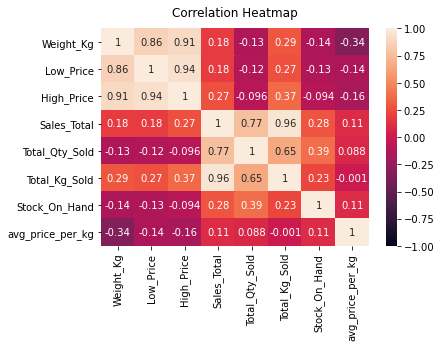

In [15]:
#Correlation heatmap of all our numerical variables.
heatmap = sns.heatmap(train.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

## Summary of our findings.

**From the short numerical analysis above we can see the following:**

  - The max values of our numerical variables are extremely high, which can mean there are some outliers.
  - We can see that in Stock_On_Hand the minimum value is 0, which means there was a month where they had no stock to sell.
  - The kurtosis of all variables except our target variable is > 3, which means there are a large number of outliers/extreme values present.
  - We can see on our correlation matrix that most of our variables are not even close to being correlated with the target variable.

** There are several steps one can take to improve on the above, but for this analysis, we are going to use all variables and see what the best model is.** 


# We know our end goal is to predict the average price per kg for Golden Delicious Apples.

**From the statement above we can already identify our Target Variable(Y):**

  - Target Variable(Y): avg_price_per_kg



**Another variable that we will look at more in-depth is Season.**

- For the sake of this notebook we will make use of all features for our regression model to see how accurate we can get our predictive results without dropping any variables or feature engineer new variables.


In [ ]:
#Histogram of our target variable.
fig,(ax10) = plt.subplots(1,1,figsize=(15,5))
sns.histplot(data=train, x="avg_price_per_kg", kde=True, color='red',ax=ax10)
ax10.set_title('Average Price Per Kilogram')

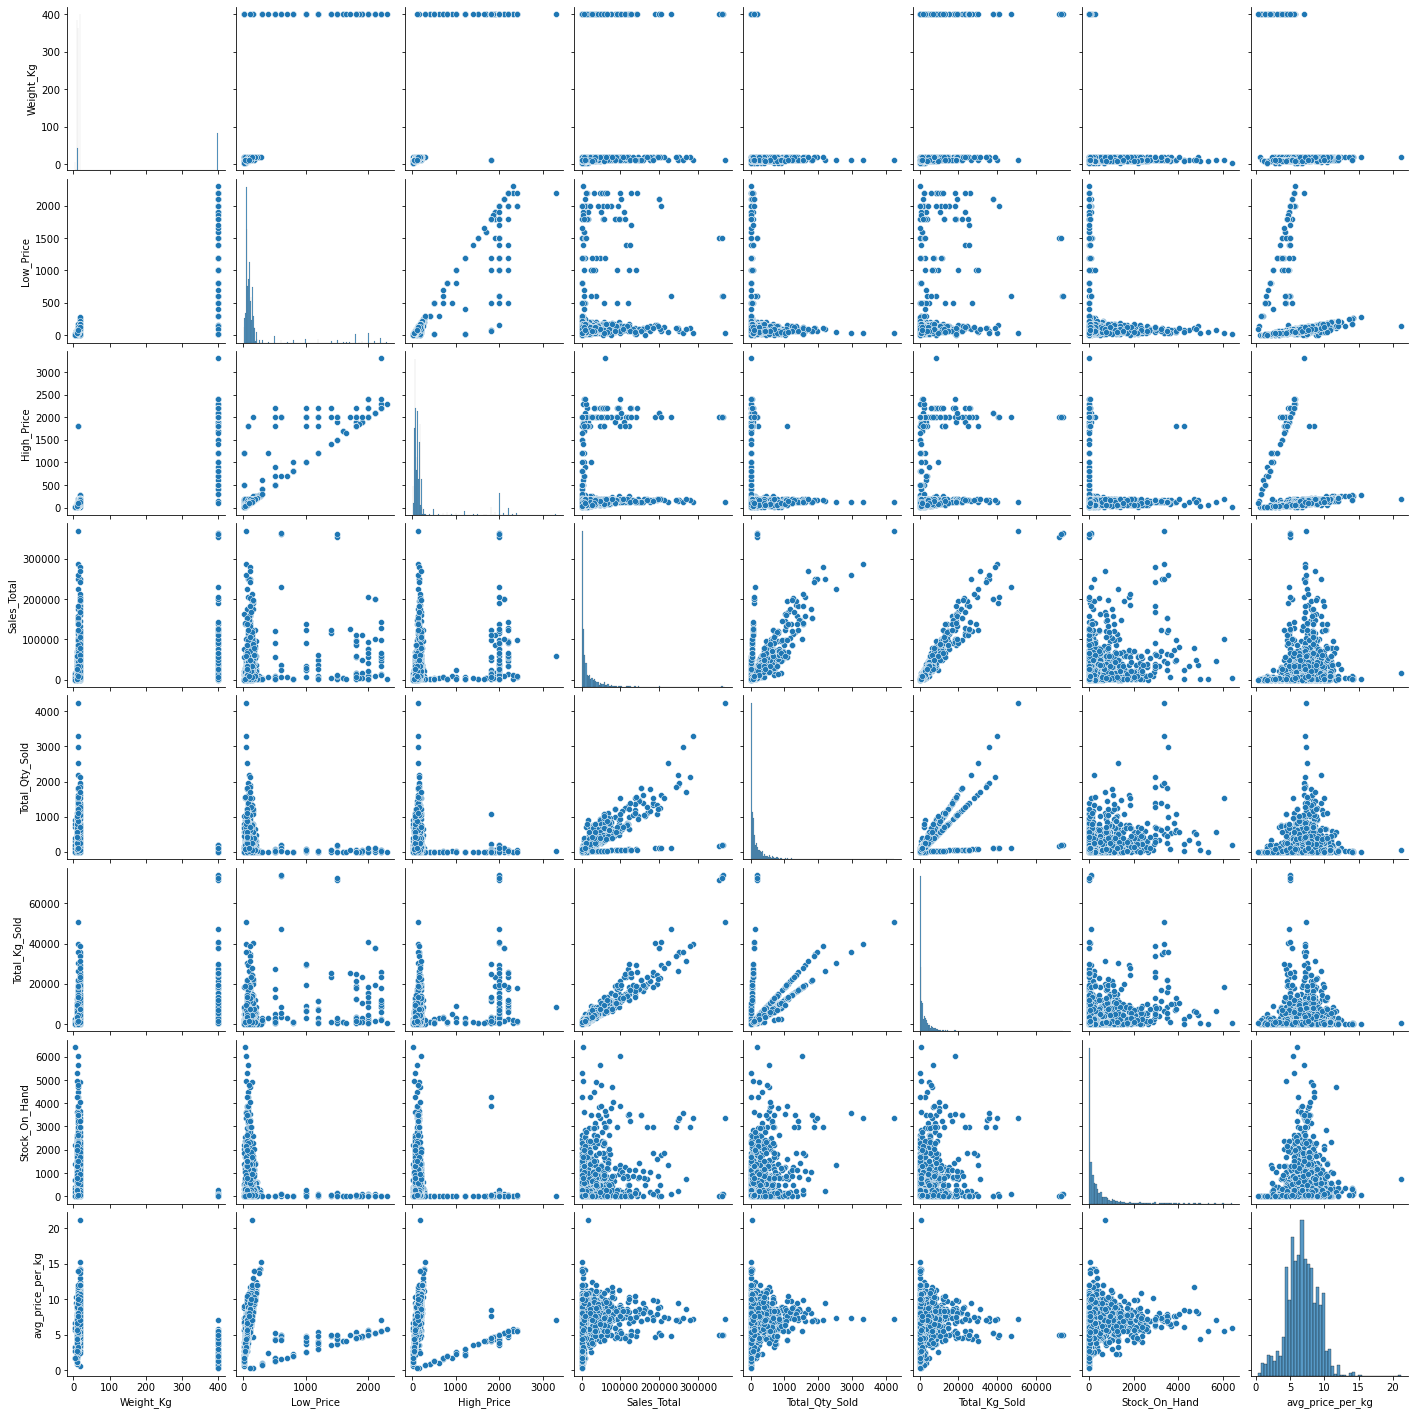

In [16]:
#Pairplot/scatter plot of all numeric variables.
sns.pairplot(train, palette='red')

In [17]:
#Creating month column for data exploration purposes.
train['Month'] = pd.DatetimeIndex(train['Date']).month
train['Month'] = train['Month'].apply(lambda x: calendar.month_abbr[x])
train.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Season,Month
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51,Spring,Sep
7,CAPE,JG110,2M,11.0,APPLE GOLDEN DELICIOUS,2020-04-14,50.0,50.0,16000.0,320,3520.0,0,4.55,Autumn,Apr
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,APPLE GOLDEN DELICIOUS,2020-04-16,55.0,55.0,990.0,18,162.0,1506,6.11,Autumn,Apr
40,CAPE,M4183,1S,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,80.0,120.0,32020.0,388,7100.4,443,4.51,Autumn,May
69,EASTERN CAPE,IA400,1S,400.0,APPLE GOLDEN DELICIOUS,2020-09-28,1800.0,1800.0,1800.0,1,400.0,2,4.50,Spring,Sep


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Sep'),
  Text(1, 0, 'Apr'),
  Text(2, 0, 'May'),
  Text(3, 0, 'Mar'),
  Text(4, 0, 'Dec'),
  Text(5, 0, 'Aug'),
  Text(6, 0, 'Jul'),
  Text(7, 0, 'Feb'),
  Text(8, 0, 'Jun'),
  Text(9, 0, 'Jan'),
  Text(10, 0, 'Oct')])

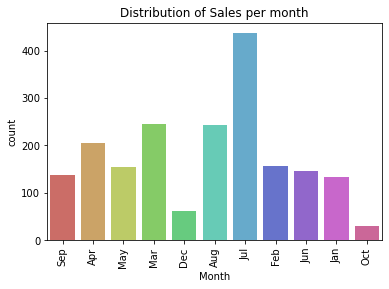

In [18]:
#Count Plot of the distribution of total sales each month.
sns.countplot(x = 'Month', data = train, palette="hls")
plt.title("Distribution of Sales per month")
plt.xticks(rotation = 90)

Text(0.5, 1.0, 'Distribution of avg price per month')

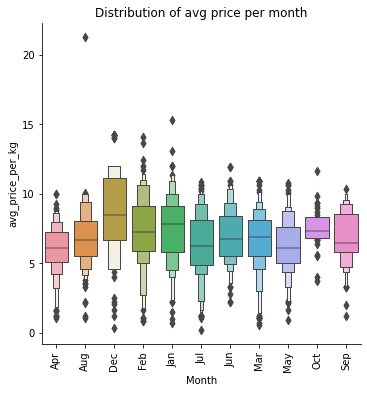

In [19]:
#Avg price per kg distribution for different months.
g = sns.catplot(x="Month", y="avg_price_per_kg", kind="boxen",
            data=train.sort_values("Month"))
g.set_xticklabels(rotation = 90)
plt.title("Distribution of avg price per month")

Text(10.049999999999997, 0.5, 'Average price per kg')

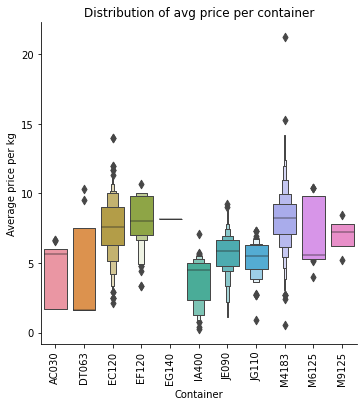

In [20]:
#Avg price per kg distribution for different containers.
g = sns.catplot(x="Container", y="avg_price_per_kg", kind="boxen",
            data=train.sort_values("Container"))
g.set_xticklabels(rotation = 90)
plt.title("Distribution of avg price per container")
plt.ylabel('Average price per kg')

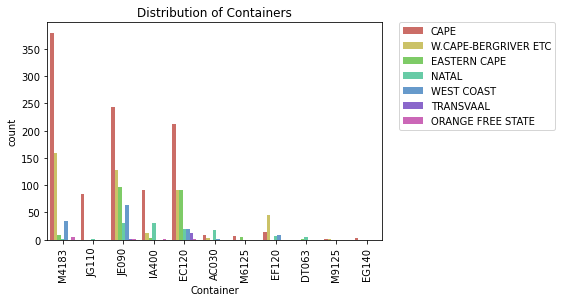

In [21]:
#Count of containers that transported apples per province.
sns.countplot(x = 'Container', data = train, palette="hls", hue='Province')
plt.title("Distribution of Containers")
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

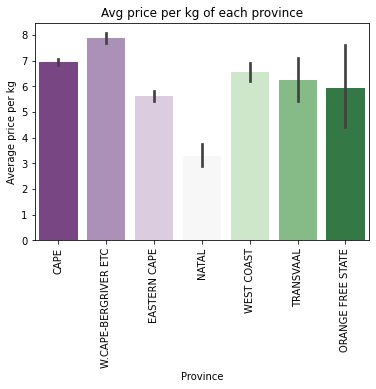

In [22]:
# Visualizing the average price per kg of each province.
sns.barplot(x='Province', y=train['avg_price_per_kg'].apply(np.mean) ,data = train, palette='PRGn')
plt.ylabel('Average price per kg')
plt.xlabel('Province')
plt.title('Avg price per kg of each province')
plt.xticks(rotation = 90)
plt.show()

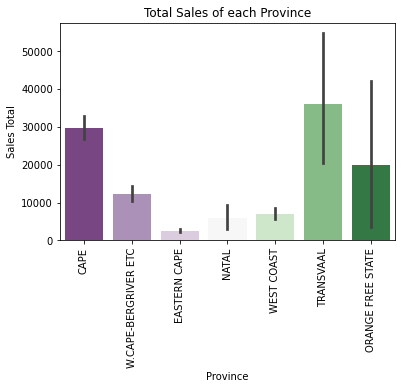

In [23]:
# Visualizing the total sales of each province.
sns.barplot(x='Province', y=train['Sales_Total'].apply(np.mean) ,data = train, palette='PRGn')
plt.ylabel('Sales Total')
plt.xlabel('Province')
plt.title('Total Sales of each Province')
plt.xticks(rotation = 90)
plt.show()

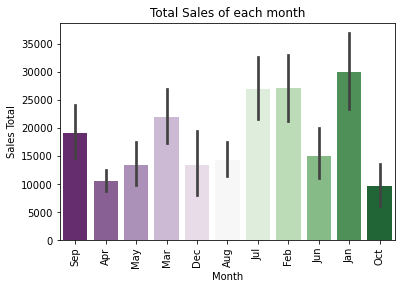

In [24]:
# Visualizing the total sales of each month.
sns.barplot(x='Month', y=train['Sales_Total'].apply(np.mean) ,data = train, palette='PRGn')
plt.ylabel('Sales Total')
plt.xlabel('Month')
plt.title('Total Sales of each month')
plt.xticks(rotation = 90)
plt.show()

In [25]:
#Dropping the month variable since we don't need it for seasons.
train = train.drop(['Month'], axis = 1)

### Below is some comparisons with Season.


C:\Users\ThandokuhleNedbank\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ThandokuhleNedbank\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ThandokuhleNedbank\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

Text(0, 0.5, 'Density')

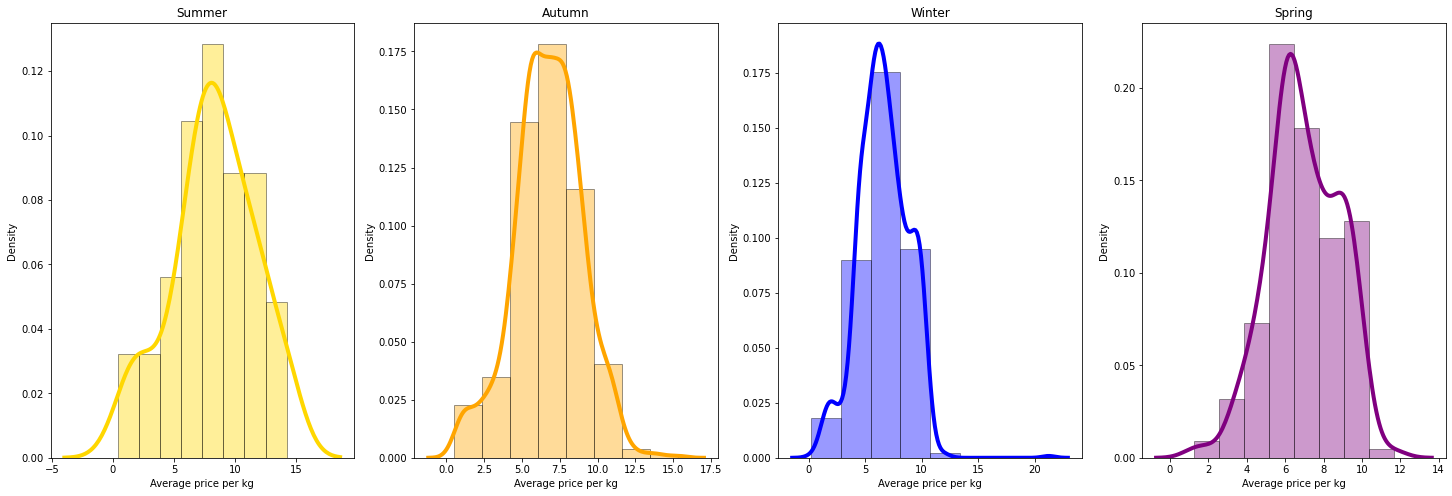

In [26]:
# Distribution plots for our Seasons against Target Variable.
fig,(ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(25,8))

#Summer
sns.distplot(train[train['Season']=='Summer']['avg_price_per_kg'], hist=True, kde=True,
             bins=int(200/25), color = 'gold', 
             ax = ax1,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax1.set_title('Summer')
ax1.set_xlabel('Average price per kg')
ax1.set_ylabel('Density')

#Autumn 
sns.distplot(train[train['Season']=='Autumn']['avg_price_per_kg'], hist=True, kde=True,
             bins=int(200/25), color = 'orange', 
             ax = ax2,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax2.set_title('Autumn')
ax2.set_xlabel('Average price per kg')
ax2.set_ylabel('Density')

#Winter
sns.distplot(train[train['Season']=='Winter']['avg_price_per_kg'], hist=True, kde=True,
             bins=int(200/25), color = 'blue',  
             ax = ax3,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax3.set_title('Winter')
ax3.set_xlabel('Average price per kg')
ax3.set_ylabel('Density')

#Spring
sns.distplot(train[train['Season']=='Spring']['avg_price_per_kg'], hist=True, kde=True,
             bins=int(200/25), color = 'purple', 
             ax = ax4,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax4.set_title('Spring')
ax4.set_xlabel('Average price per kg')
ax4.set_ylabel('Density')

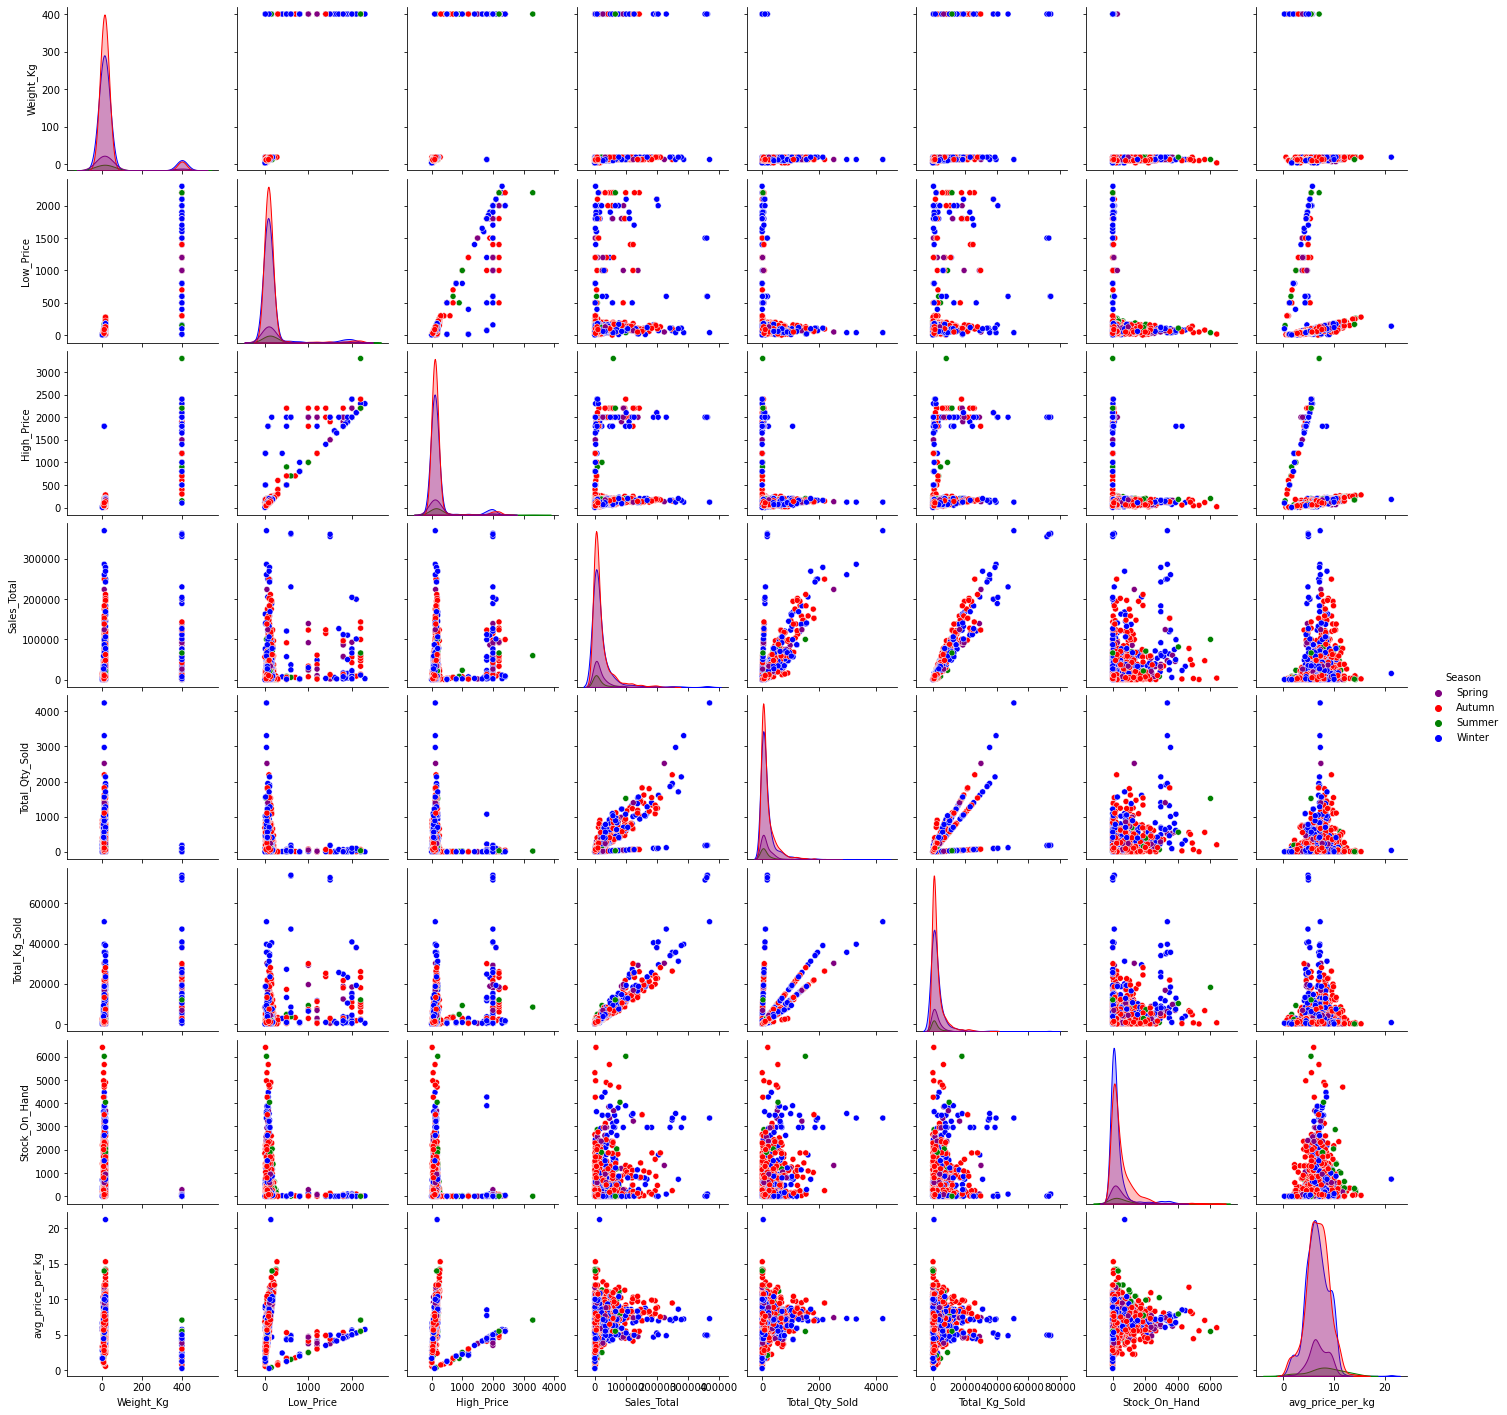

In [27]:
#Correlation pairplot of all variables in different seasons.
colors={'Summer':'green','Autumn':'red','Winter':'blue','Spring':'purple'}
sns.pairplot(data=train, hue='Season',palette= colors)

Text(12.75088541666667, 0.5, 'Average price per kg')

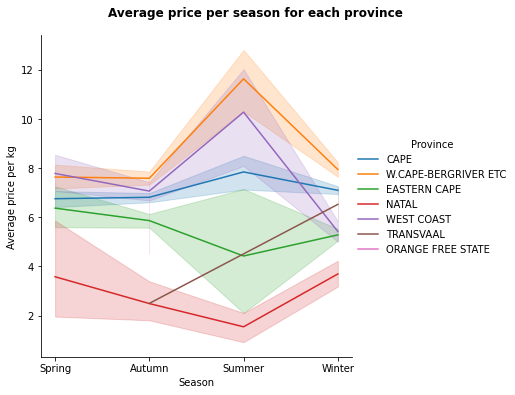

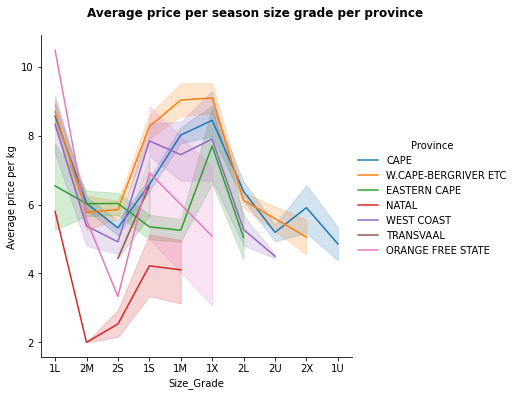

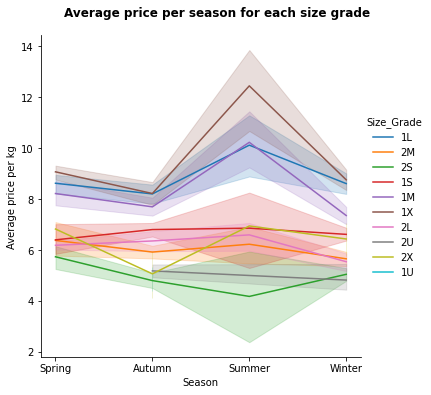

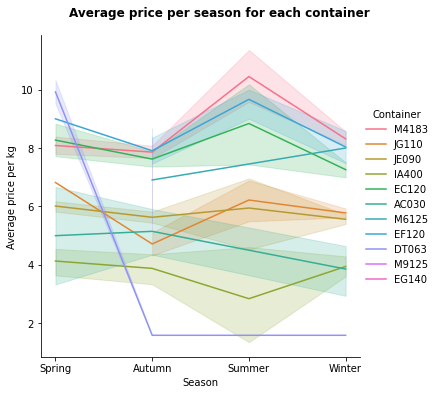

In [28]:
#Making use of Relationship plot to see the avg price during different seasons for each Province.
z = sns.relplot(x="Season", y="avg_price_per_kg", hue="Province", kind="line", data=train)
# Title for the complete figure
z.fig.suptitle("Average price per season for each province", fontsize= 12, fontweight='bold', y =1.05)
plt.ylabel('Average price per kg')


#Making use of Relationship plot to see the avg price during different seasons for each Province.
o = sns.relplot(x="Size_Grade", y="avg_price_per_kg", hue="Province", kind="line", data=train)
# Title for the complete figure
o.fig.suptitle("Average price per season size grade per province", fontsize= 12, fontweight='bold', y =1.05)
plt.ylabel('Average price per kg')


#Making use of Relationship plot to see the avg price during different seasons for each Size Grade.
x = sns.relplot(x="Season", y="avg_price_per_kg", hue="Size_Grade", kind="line", data=train)
# Title for the complete figure
x.fig.suptitle("Average price per season for each size grade", fontsize= 12, fontweight='bold', y =1.05)
plt.ylabel('Average price per kg')


#Making use of Relationship plot to see the avg price during different seasons for each Container.
k = sns.relplot(x="Season", y="avg_price_per_kg", hue="Container", kind="line", data=train)
# Title for the complete figure
k.fig.suptitle("Average price per season for each container", fontsize= 12, fontweight='bold', y =1.05)
plt.ylabel('Average price per kg')

No handles with labels found to put in legend.


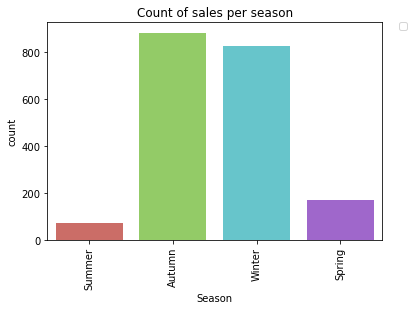

In [29]:
#Count of Sales that took place in each season.
season_order= ['Summer','Autumn','Winter','Spring']
sns.countplot(x = 'Season', data = train, palette="hls",order=season_order)
plt.title("Count of sales per season")
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Text(0.5, 1.0, 'Distribution of stock on hand per size grade')

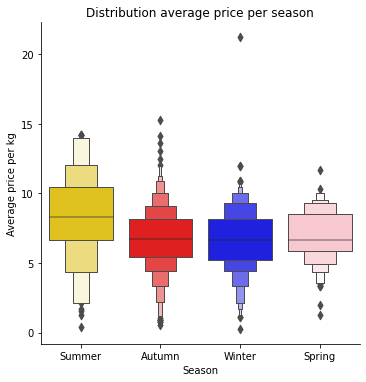

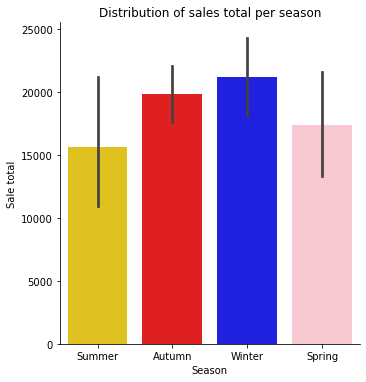

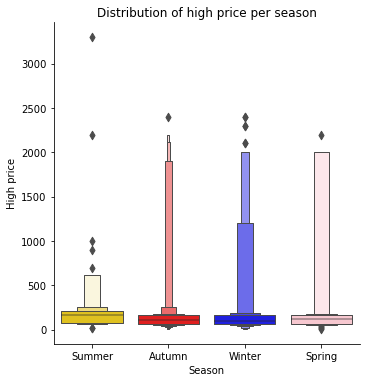

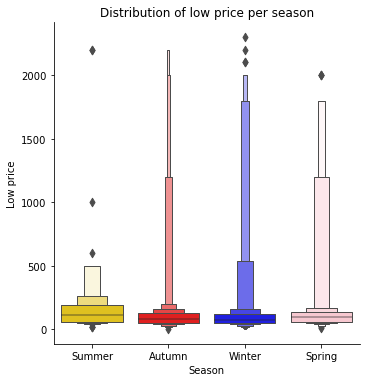

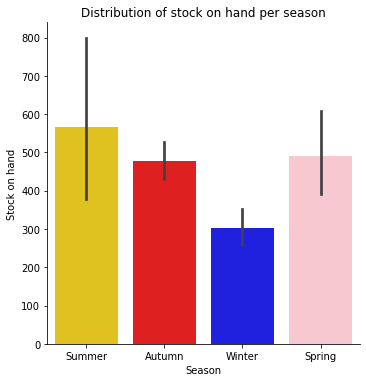

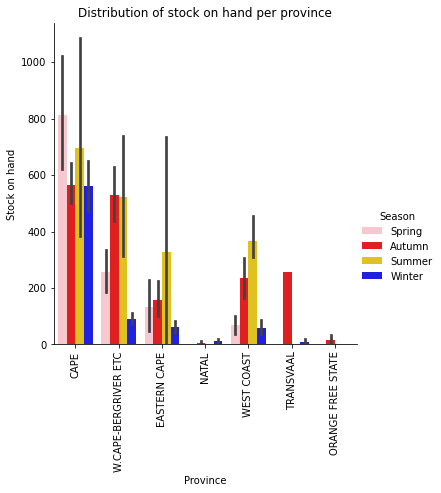

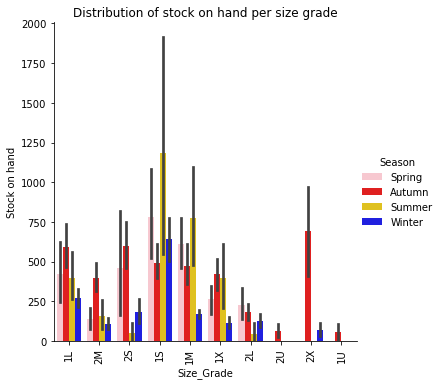

In [30]:
#Average price per kg for different Season
colors = {'Summer':'gold','Autumn':'red','Winter':'Blue','Spring':'pink'}
season_order= ['Summer','Autumn','Winter','Spring']

#Box plot for average price per kg vs season
sns.catplot(x="Season", y="avg_price_per_kg", kind="boxen",
            data=train, order=season_order,palette=colors)
plt.ylabel('Average price per kg')
plt.title("Distribution average price per season")

#Bar plot for sales total vs season
sns.catplot(x="Season", y="Sales_Total", kind="bar",
            data=train, order=season_order, palette=colors)
plt.ylabel('Sale total')
plt.title("Distribution of sales total per season")

#Box plot for high price vs season
sns.catplot(x="Season", y="High_Price", kind="boxen",
            data=train, order=season_order,palette=colors)
plt.ylabel('High price')
plt.title("Distribution of high price per season")

#Box plot for low price vs season
sns.catplot(x="Season", y="Low_Price", kind="boxen",
            data=train, order=season_order,palette=colors)
plt.ylabel('Low price')
plt.title("Distribution of low price per season")

#Bar plot for stock on hand vs season
sns.catplot(x="Season", y="Stock_On_Hand", kind="bar",
            data=train, order=season_order,palette=colors)
plt.ylabel('Stock on hand')
plt.title("Distribution of stock on hand per season")

#Bar plot for stock on hand vs province
sns.catplot(x="Province", y="Stock_On_Hand", kind="bar",
            data=train, hue='Season',palette=colors)
plt.xticks(rotation = 90)
plt.ylabel('Stock on hand')
plt.title("Distribution of stock on hand per province")


#Bar plot for stock on hand vs size grade
sns.catplot(x="Size_Grade", y="Stock_On_Hand", kind="bar",
            data=train, hue='Season',palette=colors)
plt.xticks(rotation = 90)
plt.ylabel('Stock on hand')
plt.title("Distribution of stock on hand per size grade")


## Summary of our Target Variable and Seasonal Findings:

**From looking at the graphs above we could extract the following information:**

**Average price per kg:**
- Looking at the distribution of our histogram we can see that the avg price spread quite evenly, it is a little skewed to the right due to some extreme values. Otherwise, it forms a great bell shape for the data.

- Looking at our scatter plots we can see that there are a few outliers/extreme values between our numerical variables, also one notices there is not any strong correlation towards our Target Variable.

- By including the Months Column we can get more insight to see which months have performed the best, from the graph we see that Mar, July, and Aug are the best 3 months and Oct, Nov and Dec are the worst months.

- Taking our target variable and comparing it to all months we can see that for the best three months the prices on average are lower than on the worst 3 months.

- By comparing our Target variable to containers and Province we can see that the top 3 most used containers are also being used highly in Cape W.Cape and Eastern Cape, their avg price per kg for those containers is also quite high meaning that those regions are where the main farms are and the cost would be much more significant to transport the produce to Durban harbor.

- We can also see that the Cape is the most popular area to grow apples since the summers are hot but not too hot and the winters are cold but not too cold. Season temperatures are perfect for apple farms in Cape regions.

- We can see that the avg price per kg for different provinces is confirming that all the further the province are from KZN(Durban Harbour) the more likely the price will increase.

- We can see for January and February that is identified as the start of harvesting months in South Africa the sales total are the highest for local buyers and then again very high mid-winter for European buyers.

- We can see in our Seasonal distribution plots that all seasons looks evenly distributed and makes a bell shape, except winter is a little off due to some extreme values.

**Seasons:**
- In the scatter plots it looks much the same as previously mentioned not any significant finds except for Winter that show quite extreme values across all plots.

- Taking a look at all relationship plots we can see that the price would be higher starting summer and then drop as the year progress(high supply = lower price) 
heading into autumn and winter where the most sales will be done due to European markets wanting to buy apples.

- We can see our stock on hand is low in Winter due to huge supply selling for European markets.

- Our Sales total is the highest in Winter, Europeans pay in euro so we can increase the price to make better profits.

- We can see that in high supply seasons the price is lower and in low supply time of the year price is higher.

- We could see there was a high sales demand for Autumn and Winter.

- There was a shortage of stock in Spring.

** There are several steps one can take to improve on the above, but for this analysis, we are going to use all variables and see what the best model is.** 


# 4: Model Selection

Avg_Price_Per_Kg ~ All Feautures

## Let us prepare our data before we train and test it. Drop unnecessary columns and turn our categorical features into dummies.

In [31]:
#Take a look at our data.
train.head(1)

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Season
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51,Spring


In [32]:
#Remove Commodities and Date column, not needed and seen as redundant columns.
train = train.drop(['Commodities','Date'], axis = 1)

In [33]:
#New train data after dropping columns.
train.head(1)

,Province,Container,Size_Grade,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Season
1,CAPE,M4183,1L,18.3,150.0,170.0,51710.0,332,6075.6,822,8.51,Spring


In [34]:
#Get dummies for Categorical variables  .
dummies_train = pd.get_dummies(data=train, columns=['Province','Container','Size_Grade','Season'])

In [35]:
#We will need to move avg price per kg to last column.
dummies_train.head(1)

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Province_CAPE,Province_EASTERN CAPE,...,Size_Grade_1X,Size_Grade_2L,Size_Grade_2M,Size_Grade_2S,Size_Grade_2U,Size_Grade_2X,Season_Autumn,Season_Spring,Season_Summer,Season_Winter
1,18.3,150.0,170.0,51710.0,332,6075.6,822,8.51,1,0,...,0,0,0,0,0,0,0,1,0,0


In [36]:
column_titles = [col for col in dummies_train.columns if col!= 'avg_price_per_kg'] + ['avg_price_per_kg']
dummies_train = dummies_train.reindex(columns=column_titles)

In [37]:
#We can see our target variable is now the last column
dummies_train.head(1)

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Province_CAPE,Province_EASTERN CAPE,Province_NATAL,...,Size_Grade_2L,Size_Grade_2M,Size_Grade_2S,Size_Grade_2U,Size_Grade_2X,Season_Autumn,Season_Spring,Season_Summer,Season_Winter,avg_price_per_kg
1,18.3,150.0,170.0,51710.0,332,6075.6,822,1,0,0,...,0,0,0,0,0,0,1,0,0,8.51


## Now we can start to train and test our models on the train data.

In [38]:
#Make our X and y dataframe for the train,test and split part.
X = dummies_train.drop(columns= ['avg_price_per_kg'], axis =1)
y = dummies_train['avg_price_per_kg']

In [39]:
#Standard code for train test and split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

# Linear Regression Models

        1. Multpiple Linear Regression
        2. Ridge Regression
        3. Lasso

##  1: Multiple Linear Regression

In [40]:
#We name our model according to the model we use in this case Multiple Linear Regression.
lm = LinearRegression()
#Fit the model to our Train model.
lm.fit(X_train, y_train)

LinearRegression()

In [41]:
#Gen_y is for Training data that we already have, gen_y_test is what we try to get, so we take our model and predict the values we need.
gen_y = lm.predict(X_train)
gen_y_test = lm.predict(X_test)


In [42]:
#All our new predicted values for 10% test set
gen_y_test

array([ 5.75077665,  5.09860957,  8.72990514,  6.9172833 ,  6.60128935,
        8.46760245,  8.72917701,  8.43384939,  6.04339156,  8.74237768,
        6.70681645,  7.57853067,  7.0362471 ,  5.6065177 ,  8.50692479,
        6.86604111,  6.30044386,  3.21919218,  4.22796538,  8.74960987,
        8.30177385,  7.89727382,  6.04292229,  5.3779588 ,  4.91448669,
        6.44332713,  8.1314244 ,  8.25790326,  5.39518072, 10.98756061,
        5.70929745,  6.45529707,  5.1232952 ,  8.47236721,  5.09004925,
        6.75842203,  8.94802243,  6.07302707,  5.90219362,  7.45229012,
        8.78525196,  6.38852321,  8.50142574,  7.4405077 ,  3.95535217,
        7.40894702,  6.1243412 ,  8.14845435,  4.42521283,  6.43195426,
        5.82310174,  4.32069841,  8.38539918,  6.34553611,  5.04907574,
        5.3343211 ,  5.5078254 ,  8.40197259,  6.65451759,  5.79682474,
        8.66232918,  6.99107645,  6.39029191,  8.20036487,  7.00372864,
        7.17099521,  5.95147397,  8.18368529,  8.53199811,  8.51

In [43]:
print('Training:')
#Calculate the mean-squared-error
print('MSE:', metrics.mean_squared_error(y_train, gen_y))
#Calculate the R-squared metric
print('R_squared:', metrics.r2_score(y_train, gen_y))
#Calculate the RMSE
print('RMSE:', metrics.mean_squared_error(y_train, gen_y, squared= False))

print('Testing:')
#Calculate the mean-squared-error
print('MSE:', metrics.mean_squared_error(y_test, gen_y_test))
#Calculate the R-squared metric
print('R_squared:', metrics.r2_score(y_test, gen_y_test))
#Calculate the RMSE
print('RMSE:', metrics.mean_squared_error(y_test, gen_y_test, squared=False))

Training:
MSE: 1.8927373322161787
R_squared: 0.6225825909891827
RMSE: 1.3757679063767183
Testing:
MSE: 1.8792218068670312
R_squared: 0.6519261074431815
RMSE: 1.3708471128711004


## 2: Ridge Regression

In [44]:
#Create scaler object/standardize our variables.
scaler = StandardScaler()
#Create scaled version of the predictors (there is no need to scale the response).
X_scaled = scaler.fit_transform(X)

In [45]:
#Convert the scaled predictor values into a dataframe.
X_standardise = pd.DataFrame(X_scaled,columns=X.columns)
X_standardise.head()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Province_CAPE,Province_EASTERN CAPE,Province_NATAL,...,Size_Grade_1X,Size_Grade_2L,Size_Grade_2M,Size_Grade_2S,Size_Grade_2U,Size_Grade_2X,Season_Autumn,Season_Spring,Season_Summer,Season_Winter
0,-0.222433,-0.065087,-0.105317,0.811807,0.510117,0.511073,0.571070,0.931634,-0.343488,-0.245547,...,-0.30986,-0.255934,-0.367265,-0.432837,-0.093731,-0.116187,-0.910730,3.258688,-0.195698,-0.857386
1,-0.295704,-0.332855,-0.382175,-0.103950,0.471248,0.091837,-0.563874,0.931634,-0.343488,-0.245547,...,-0.30986,-0.255934,2.722828,-0.432837,-0.093731,-0.116187,1.098021,-0.306872,-0.195698,-0.857386
2,-0.315779,-0.319467,-0.370639,-0.488870,-0.506948,-0.459029,1.515476,-1.073382,-0.343488,-0.245547,...,-0.30986,-0.255934,-0.367265,2.310338,-0.093731,-0.116187,1.098021,-0.306872,-0.195698,-0.857386
3,-0.222433,-0.252525,-0.220674,0.306871,0.691504,0.679187,0.047781,0.931634,-0.343488,-0.245547,...,-0.30986,-0.255934,-0.367265,-0.432837,-0.093731,-0.116187,1.098021,-0.306872,-0.195698,-0.857386
4,3.608756,4.353082,3.655338,-0.468098,-0.562012,-0.419986,-0.561112,-1.073382,2.911310,-0.245547,...,-0.30986,-0.255934,-0.367265,-0.432837,-0.093731,-0.116187,-0.910730,3.258688,-0.195698,-0.857386


In [46]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_standardise, y, test_size=0.2, shuffle=True)

In [47]:
#Create ridge model
ridge = Ridge()
#Train the model
ridge.fit(X_train1, y_train1)

Ridge()

In [48]:
#Get predictions
y_pred1 = ridge.predict(X_test1)
#Compute RMSE
print("RMSE:",np.sqrt(mean_squared_error(y_test1,y_pred1)))

RMSE: 1.3556170596108206


## 3: Lasso

In [49]:
#Create LASSO model object, setting alpha to 0.005
lasso = Lasso(alpha=0.005)
#Train the LASSO model
lasso.fit(X_train, y_train)

Lasso(alpha=0.005)

In [50]:
#Get predictions
y_pred = lasso.predict(X_test)

#Compute RMSE
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE: 1.3803452872050042


# Non Linear Regression Models

        4. K-Neighbors
        5. Decision Tree
        6. Random Forest 
        7. Gradient Boost 
        8. Ada Boost
        9. Bagging 
        10. Extra Trees

## 4: K-Neighbors 

In [51]:
#Create K-neighbors model
Kmodel = KNeighborsRegressor(n_neighbors = 5)

In [52]:
#Train the K-neighbors model
Kmodel.fit(X_train, y_train)

KNeighborsRegressor()

In [53]:
#Get predictions for test data
y_pred = Kmodel.predict(X_test)

#Calculate MSE
MSE = mean_squared_error(y_pred,y_test)

#Report RMSE
print('Kmodel RMSE is:',np.sqrt(MSE))

Kmodel RMSE is: 1.1734584242611188


## 5: Decision Tree

In [54]:
#Create decision tree model
dec_tree = DecisionTreeRegressor(max_depth=15,random_state=0)

In [55]:
#Train the decision tree model
dec_tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=15, random_state=0)

In [56]:
#Get predictions for test data
y_pred = dec_tree.predict(X_test)

#Calculate MSE
MSE = mean_squared_error(y_pred,y_test)

#Report RMSE
print("Regression Decision Tree model RMSE is:",np.sqrt(MSE))

Regression Decision Tree model RMSE is: 0.6780163849221471


## 6: Random Forest

In [57]:
#Create Random forest model
RF = RandomForestRegressor(n_estimators=300, max_depth=10)
#Train the Random forest model
RF.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, n_estimators=300)

In [58]:
#Get predictions
y_pred = RF.predict(X_test)

#Compute RMSE
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE: 0.49865504706501224


## 7: Gradient Boosting 

In [59]:
#Create Gradient boosting model
GB = GradientBoostingRegressor(random_state=42, n_estimators=2500)

In [60]:
#Train Gradient boosting model
GB.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=2500, random_state=42)

In [61]:
#Get predictions for test data
y_pred = GB.predict(X_test)

#Calculate MSE
MSE = mean_squared_error(y_pred,y_test)

#Report RMSE
print("Gradient Boost model RMSE is:",np.sqrt(MSE))

Gradient Boost model RMSE is: 0.3665404434212447


## 8: ADA Boost Regressor

In [62]:
#Create Ada boost model
AdaB = AdaBoostRegressor(random_state=0, n_estimators=200)

In [63]:
#Train Ada boost model
AdaB.fit(X_train, y_train)

AdaBoostRegressor(n_estimators=200, random_state=0)

In [64]:
#Get predictions for test data
y_pred = AdaB.predict(X_test)

#Calculate MSE
MSE = mean_squared_error(y_pred,y_test)

#Report RMSE
print("Ada Boost model RMSE is:",np.sqrt(MSE))

Ada Boost model RMSE is: 1.1154754434724496


## Model 9: Bagging Regression

In [65]:
#Create Bagging model
BR = BaggingRegressor(random_state=42, n_estimators=300)

In [66]:
#Train Bagging model
BR.fit(X_train, y_train)

BaggingRegressor(n_estimators=300, random_state=42)

In [67]:
#Get predictions for test data
y_pred = BR.predict(X_test)

#Calculate MSE
MSE = mean_squared_error(y_pred,y_test)

#Report RMSE
print("Bagging model RMSE is:",np.sqrt(MSE))

Bagging model RMSE is: 0.4957765248712155


## Model 10: Extra trees Regression

In [68]:
#Create Extra trees model
ET = ExtraTreesRegressor(n_estimators=300, random_state=42)

In [69]:
#Train Extra trees model
ET.fit(X_train, y_train)

ExtraTreesRegressor(n_estimators=300, random_state=42)

In [70]:
#Get predictions for test data
y_pred = ET.predict(X_test)

#Calculate MSE
MSE = mean_squared_error(y_pred,y_test)

#Report RMSE
print("Extra Trees model RMSE is:",np.sqrt(MSE))

Extra Trees model RMSE is: 0.439508598670138


# 5: Model Evaluation

## 5.1: Linear Models and K-Neighbors except Ridge

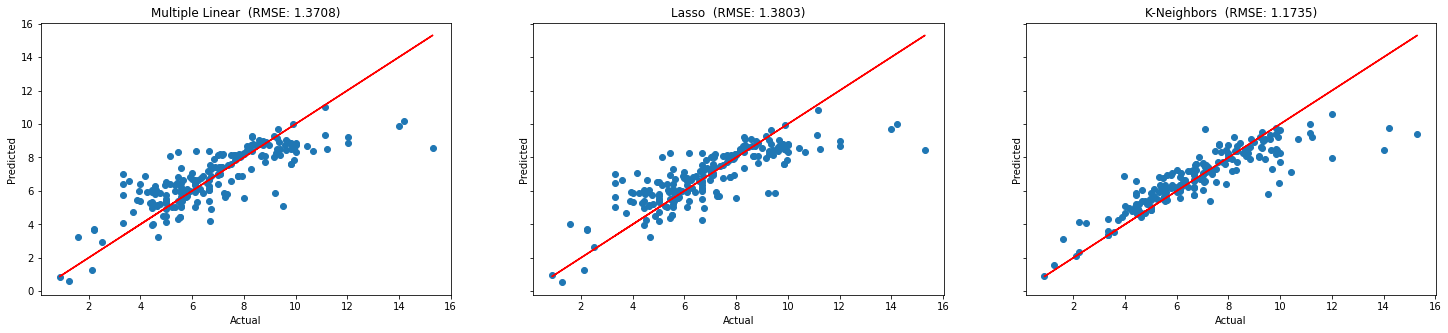

In [71]:
#Create figure and axes
f, ax = plt.subplots(figsize=(25,5), nrows=1, ncols=3, sharey=True)

#Create list of titles and predictions to use in for loop
pred = [lm.predict(X_test), lasso.predict(X_test), Kmodel.predict(X_test)]
title = ['Multiple Linear','Lasso','K-Neighbors']

#Loop through all axes to plot each model's results 
for i in range(3):
    rmse = round(np.sqrt(mean_squared_error(pred[i],y_test)), 4)
    ax[i].set_title(title[i]+"  (RMSE: "+str(rmse)+ ")")
    ax[i].set_xlabel('Actual')
    ax[i].set_ylabel('Predicted')
    ax[i].plot(y_test,y_test,'r')
    ax[i].scatter(y_test,pred[i]) 

In [72]:
#Now we compare our Accuracy scores for all linear models and K-Neighbors
print('1. Multiple Linear')
print("Train set accuracy: ", lm.score(X_train,y_train))
print("Test set accuracy: ", lm.score(X_test,y_test))

print('2. Ridge')
print("Train set accuracy: ", ridge.score(X_train1,y_train1))
print("Test set accuracy: ", ridge.score(X_test1,y_test1))

print('3. Lasso')
print("Train set accuracy: ", lasso.score(X_train,y_train))
print("Test set accuracy: ", lasso.score(X_test,y_test))

print('4. K-Neighbors')
print("Train set accuracy: ", Kmodel.score(X_train,y_train))
print("Test set accuracy: ", Kmodel.score(X_test,y_test))

1. Multiple Linear
Train set accuracy:  0.6225825909891827
Test set accuracy:  0.6519261074431815
2. Ridge
Train set accuracy:  0.6257878971882345
Test set accuracy:  0.6166352781107565
3. Lasso
Train set accuracy:  0.6175851837020783
Test set accuracy:  0.6470860055295418
4. K-Neighbors
Train set accuracy:  0.878648148490635
Test set accuracy:  0.7449479486604667


### Out of the models above we can see that K-Neighbors gives the highest accuracy for training and test set.

## 5.2: All Non Linear Models 

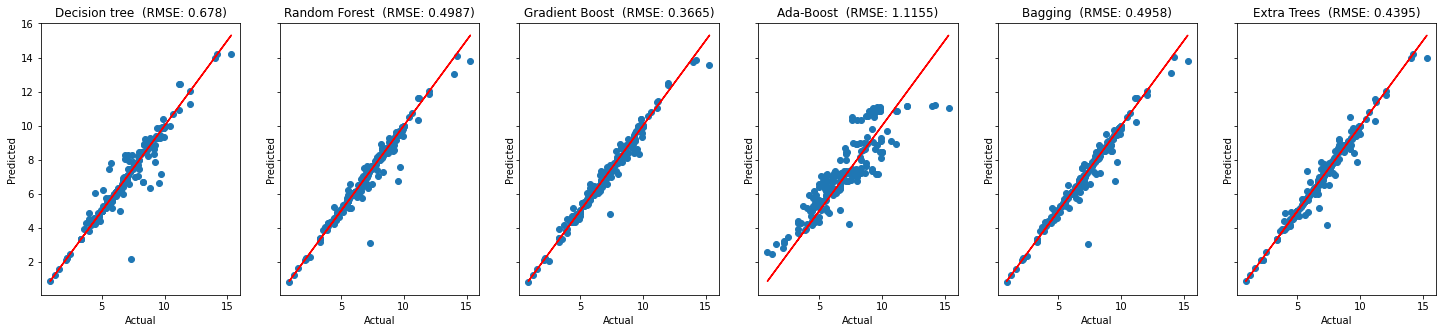

In [73]:
#Create figure and axes
f, ax = plt.subplots(figsize=(25,5), nrows=1, ncols=6, sharey=True)

#Create list of titles and predictions to use in for loop
pred = [dec_tree.predict(X_test), RF.predict(X_test), GB.predict(X_test),AdaB.predict(X_test), BR.predict(X_test), ET.predict(X_test)]
title = ['Decision tree', 'Random Forest','Gradient Boost','Ada-Boost','Bagging','Extra Trees']

#Loop through all axes to plot each model's results 
for i in range(6):
    rmse = round(np.sqrt(mean_squared_error(pred[i],y_test)), 4)
    ax[i].set_title(title[i]+"  (RMSE: "+str(rmse)+ ")")
    ax[i].set_xlabel('Actual')
    ax[i].set_ylabel('Predicted')
    ax[i].plot(y_test,y_test,'r')
    ax[i].scatter(y_test,pred[i]) 

In [74]:
#Now we compare our Accuracy scores for all non-linear models
print('1. Decision Tree')
print("Train set accuracy: ", dec_tree.score(X_train,y_train))
print("Test set accuracy: ", dec_tree.score(X_test,y_test))

print('2. Random Forest')
print("Train set accuracy: ", RF.score(X_train,y_train))
print("Test set accuracy: ", RF.score(X_test,y_test))

print('3. Gradient Boost')
print("Train set accuracy: ", GB.score(X_train,y_train))
print("Test set accuracy: ", GB.score(X_test,y_test))

print('4. Ada Boost')
print("Train set accuracy: ", AdaB.score(X_train,y_train))
print("Test set accuracy: ", AdaB.score(X_test,y_test))

print('5. Bagging')
print("Train set accuracy: ", BR.score(X_train,y_train))
print("Test set accuracy: ", BR.score(X_test,y_test))

print('6. Extra Trees')
print("Train set accuracy: ", ET.score(X_train,y_train))
print("Test set accuracy: ", ET.score(X_test,y_test))

1. Decision Tree
Train set accuracy:  0.999505182665701
Test set accuracy:  0.9148521306932982
2. Random Forest
Train set accuracy:  0.9817168435224486
Test set accuracy:  0.9539431910326654
3. Gradient Boost
Train set accuracy:  0.9997412490028535
Test set accuracy:  0.9751150250209155
4. Ada Boost
Train set accuracy:  0.7560392414742593
Test set accuracy:  0.7695305132857019
5. Bagging
Train set accuracy:  0.9898140239221727
Test set accuracy:  0.9544733887981034
6. Extra Trees
Train set accuracy:  1.0
Test set accuracy:  0.9642210032324597


### As we can see above that our Gradient Boost model gives us the best accuracy for train and test set.

## Tuning Model Hyperparameters for best model.

Let's make some changes to the n_estimators parameter and compare the results:

In [75]:

#10 estimators
gb_1 = GradientBoostingRegressor(n_estimators=10, random_state=42)
#50 estimators
gb_2 = GradientBoostingRegressor(n_estimators=50, random_state=42)
#100 estimators
gb_3 = GradientBoostingRegressor(n_estimators=100, random_state=42)
#500 estimators
gb_4 = GradientBoostingRegressor(n_estimators=500, random_state=42)
#2500 estimators
gb_5 = GradientBoostingRegressor(n_estimators=2500, random_state=42)

In [76]:
gb_1.fit(X_train, y_train)
gb_2.fit(X_train, y_train)
gb_3.fit(X_train, y_train)
gb_4.fit(X_train, y_train)
gb_5.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=2500, random_state=42)

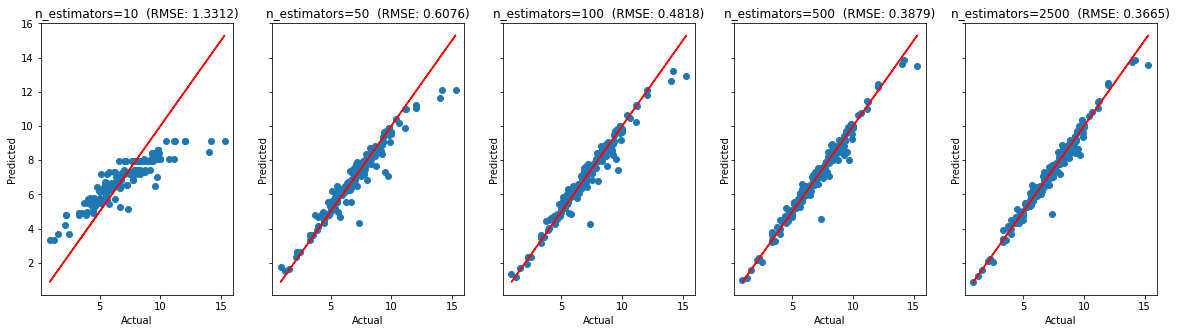

In [77]:
#Create figure and axes
f, ax = plt.subplots(figsize=(20,5), nrows=1, ncols=5,sharey=True)

#Create list of titles and predictions to use in for loop
pred = [gb_1.predict(X_test), gb_2.predict(X_test), gb_3.predict(X_test), gb_4.predict(X_test), gb_5.predict(X_test)]
title = ['n_estimators=10', 'n_estimators=50', 'n_estimators=100','n_estimators=500','n_estimators=2500']

#Loop through all axes to plot each model's results 
for i in range(5):
    rmse = round(np.sqrt(mean_squared_error(pred[i],y_test)),4)
    ax[i].set_title(title[i]+"  (RMSE: "+str(rmse)+ ")")
    ax[i].set_xlabel('Actual')
    ax[i].set_ylabel('Predicted')
    ax[i].plot(y_test,y_test,'r')
    ax[i].scatter(y_test,pred[i]) 

# Now we will test our best model on actual/real Test data.

- We identified that our best model is our Gradient Boost Regression model with the lowest RMSE 

In [78]:
#Lets look at Test file and see what column to hold or to drop
X_real = test
X_real.head(1)

,Index,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Season
0,1,W.CAPE-BERGRIVER ETC,EC120,1M,12.0,APPLE GOLDEN DELICIOUS,2020-07-09,128.0,136.0,5008.0,38,456.0,0,Winter


In [79]:
#We will need to get dummies for this data aswell
#We will also need to drop the same columns as in Train model
X_real = pd.get_dummies(data = test, columns=['Province','Container','Size_Grade','Season'])
X_real = X_real.drop(columns = ['Index','Date','Commodities'], axis=1)

In [80]:
#The data looks perfect for predicting now
X_real.head(1)

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Province_CAPE,Province_EASTERN CAPE,Province_NATAL,...,Size_Grade_1X,Size_Grade_2L,Size_Grade_2M,Size_Grade_2S,Size_Grade_2U,Size_Grade_2X,Season_Autumn,Season_Spring,Season_Summer,Season_Winter
0,12.0,128.0,136.0,5008.0,38,456.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [81]:
 #Comparing shapes to see if all columns are correct
 X.shape,X_real.shape

((1952, 39), (685, 39))

In [82]:
#Let's predict our new Target Variable with the Real Test.csv data
pred_vals = GB.predict(X_real)
pred = pd.DataFrame({'avg_price_per_kg': pred_vals})
pred

,avg_price_per_kg
0,10.877370
1,11.969536
2,10.024948
3,8.706911
4,8.006026
...,...
680,3.648019
681,10.064689
682,6.114478
683,7.297705


### Now that we have our data lets see compare our findings

Text(0.5, 1.0, 'Distribution of avg price per kg for the training data')

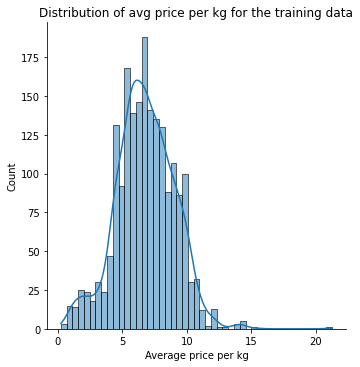

In [83]:
#Distribution plot of our training target variable
sns.displot(train['avg_price_per_kg'],kde=True)
plt.xlabel('Average price per kg')
plt.title("Distribution of avg price per kg for the training data")

Text(0.5, 1.0, 'Distribution of avg price per kg predicted on test data')

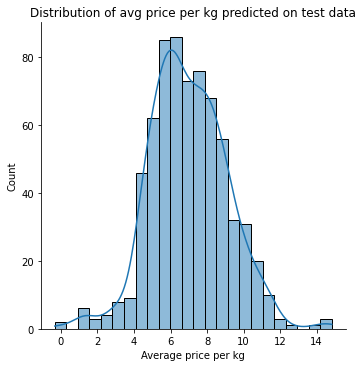

In [84]:
#Distribution plot of our predicted target variable on test.csv data
sns.displot(pred['avg_price_per_kg'],kde=True)
plt.xlabel('Average price per kg')
plt.title("Distribution of avg price per kg predicted on test data")


# 6: Conclusion

**Business:**
- Firstly out of a business perspective one would argue that Durban Fresh Produce Market would like to maximise profit as any business would doesn't matter the circumstances. After analysing the data our business proposal is that they keep a small percentage of supply in cool storage for the the months of Spring when supply is low and prices are high. 

- During these months, as seen in November where they had no stock, they will be able to sell stock in the low supply months at a higher price. Making the market a sort of monopoly for them where different markets will be low on supply but Durban Fresh Produce Market will have sock on hand, at higher prices actually making profit in the out of season months. It will reduce waste loss in high supply months and give a steady income stream in the low supply months.

- If you take 10% of the supply being sold locally in the months of Autumn and Winter. Sell that stock at higher prices during spring and summer that would increase the Revenue with +-10% and then you won't have a dead sale month in November. 

**Models:**
- We come to the conclusion that our model have predicted the Target variable up until 36,6 cents to the Rand per kg, very accurate indeed.

- As we have tried to get the best possible model by making use of all feautures, there are more possibilities of obtaining better results using parameter tuning and better preprocessing techninques. We commit to continue conducting research into discovering and training models that would yield optimal results. The insights garned from the EDA as well as model evaluation will be useful in providing stakeholders the clarity of predicting the avg_price_per_kg for the coming months.

- Our best model used as it stands have a +95% accuracy score and is sufficient in supplying the necessary data that the client requires. 

- Recommendation for fututre Machine Learning testers: The objective of parameter tuning is to find the optimum value for each parameter to improve the accuracy of the model. Tuning these parameters requires a good understanding of concepts and their individual impact on the model which can be unpacked through a more thorough EDA.

### Below we will export our model in csv format and pickle file.

In [ ]:
#Lets do our submission and extract our csv file for kaggle
submission = pd.DataFrame({'avg_price_per_kg': pred_vals})
#Removing the 0 index
submission.index = submission.index + 1
submission.reset_index(drop = False, inplace = True)
#Giving the Index column and predicted values Column names
submission.columns = ['Index', 'avg_price_per_kg']
#Exporting to csv
submission.to_csv('APPLES_PRED_FINAL_GB2.csv', index =False)

In [ ]:
#Export our model in pickle format for API
model_save_path = "mlinearmodel.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(lm,file)